###          Reference Documents:
<a href='https://spark.apache.org/docs/latest/configuration.html#application-properties'>Spark Doc</a></br>
<a href='https://help.syntasa.com/hc/en-us'>Syntasa Documentation</a></br>
<a href='https://www.youtube.com/@syntasauniversity1544/featured'>Syntasa University</a></br>

In [2]:
!pip install opencv-contrib-python -q

In [3]:
!pip install matplotlib -q
!pip install pandas -q
!pip install numpy -q

In [4]:
!pip install torch -q
!pip install torchvision -q

In [5]:
!pip install setuptools --upgrade -q
!pip install ultralytics -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.2 requires protobuf<4,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.
tensorflow-gpu 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 4.25.3 which is incompatible.


In [6]:
import os
os.environ['SETUPTOOLS_USE_DISTUTILS']='stdlib'

In [7]:
video_path='/tmp/train.mp4/'

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import boto3
import pandas as pd
import numpy as np

In [9]:
import torch
import os
import requests
from io import BytesIO

In [10]:
s3_client=boto3.client('s3')
bucket_name='gsproto-syntasa-bucket'
file_key='syn-file-uploads/users/Achawla/fmv_demo/Saudi_Arab_Roads_Surveillance_Camera.mp4'
local_path='/tmp/vid.mp4'

In [11]:
s3_client.download_file(bucket_name,file_key,local_path)

In [12]:
vid=cv.VideoCapture(local_path)

In [13]:
model=torch.hub.load('ultralytics/yolov5','yolov5l',pretrained=True)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
ret, frame= vid.read()

In [15]:
%matplotlib inline

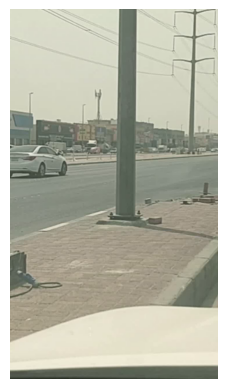

In [16]:
frame_rgb = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
plt.imshow(frame_rgb)
plt.axis('off')
plt.show()

In [17]:
res=model(frame)

In [18]:
res.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,1.349327,468.867401,198.878723,584.159790,0.919369,2,car
1,274.358490,476.263611,316.983063,502.385559,0.519657,2,car
2,121.618439,456.619324,195.141693,505.239380,0.475403,2,car
3,1.010315,1023.697144,718.480957,1272.039429,0.456036,37,surfboard
4,472.961060,477.440704,514.382690,497.916229,0.298032,2,car


In [19]:
fps=vid.get(cv.CAP_PROP_FPS)

In [20]:
fps

30.0

In [21]:
data=[]
frame_index=0
while vid.isOpened():
    ret, frame=vid.read()
    if not ret:
        break
        
    timestamp=frame_index/fps
    res=model(frame)
    df=res.pandas().xyxy[0]
    df['frame']=frame_index
    df['timestamp']=timestamp
    data.append(df)
    
    
    print(frame_index)
    frame_index+=1
vid.release()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [22]:
frames=vid.get(cv.CAP_PROP_FRAME_COUNT)
frames

0.0

In [23]:
final_df=pd.concat(data)
final_df

,xmin,ymin,xmax,ymax,confidence,class,name,frame,timestamp
0,0.238235,468.744751,209.572250,583.232056,0.919980,2,car,0,0.0
1,272.679810,476.621033,315.857727,502.181519,0.528723,2,car,0,0.0
2,123.166077,456.782593,195.751953,503.777344,0.452412,2,car,0,0.0
3,1.211975,1023.566650,718.535095,1272.071777,0.433909,37,surfboard,0,0.0
4,202.478287,471.726715,250.785004,496.555267,0.298237,2,car,0,0.0
...,...,...,...,...,...,...,...,...,...
0,596.831116,414.020386,719.707336,536.206421,0.916694,2,car,447,14.9
1,217.031982,387.159088,547.073364,576.237854,0.870923,7,truck,447,14.9
2,1.164551,967.784302,716.954102,1262.612671,0.509940,37,surfboard,447,14.9
3,187.296036,414.163940,255.215240,445.822144,0.448827,2,car,447,14.9


In [26]:
final_df.columns=['x_minimum','y_minimum','x_maximum','y_maximum','confidence','class','name','frame','timestamp']

In [25]:
final_df

,x_minimum,y_minimum,x_maximum,y_maximum,confidence,class,name,frame,timestamp
0,0.238235,468.744751,209.572250,583.232056,0.919980,2,car,0,0.0
1,272.679810,476.621033,315.857727,502.181519,0.528723,2,car,0,0.0
2,123.166077,456.782593,195.751953,503.777344,0.452412,2,car,0,0.0
3,1.211975,1023.566650,718.535095,1272.071777,0.433909,37,surfboard,0,0.0
4,202.478287,471.726715,250.785004,496.555267,0.298237,2,car,0,0.0
...,...,...,...,...,...,...,...,...,...
0,596.831116,414.020386,719.707336,536.206421,0.916694,2,car,447,14.9
1,217.031982,387.159088,547.073364,576.237854,0.870923,7,truck,447,14.9
2,1.164551,967.784302,716.954102,1262.612671,0.509940,37,surfboard,447,14.9
3,187.296036,414.163940,255.215240,445.822144,0.448827,2,car,447,14.9
